In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date
import function as fun

# # Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (30, 60)
lng_range = (-70, -120)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=30.000, high=60.000, size=1500)
lngs = np.random.uniform(low=-70.000, high=-120.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

660

In [3]:
# build URL to make API call based on weather data from 1/1/2008 - 12/1/2010
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&type=hour&start={1199145600}&end={1293753600}&q="

# Create the Lists to be used in the Dictionary for the Data Frame
name = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
min_temp = []
wind_speed = []
counter = 0

# Loop through the entire list of cities and request data for each city
for city in cities:
    try:
        city_response = requests.get(query_url + city).json()
        name.append(city_response['name'])
        country.append(city_response['sys']['country'])
        date.append(city_response['dt'])
        humidity.append(city_response['main']['humidity'])
        lat.append(city_response['coord']['lat'])
        lng.append(city_response['coord']['lon'])
        max_temp.append(city_response['main']['temp_max'])
        min_temp.append(city_response['main']['temp_min'])
        wind_speed.append(city_response['wind']['speed'])
        counter += 1
        print(f"Processing Request {counter} | {city}")
        time.sleep(2)
    except Exception:
        print(f"City not found -- Skipping: {city}")

Processing Request 1 | fernie
Processing Request 2 | hailey
Processing Request 3 | sioux lookout
Processing Request 4 | abbeville
Processing Request 5 | el sauzal
Processing Request 6 | newton
Processing Request 7 | scottsbluff
Processing Request 8 | duluth
Processing Request 9 | toccoa
Processing Request 10 | matagami
Processing Request 11 | ridgecrest
Processing Request 12 | monroe
Processing Request 13 | natchitoches
Processing Request 14 | castlegar
Processing Request 15 | pecos
Processing Request 16 | saint paul
Processing Request 17 | burlington
City not found -- Skipping: attawapiskat
Processing Request 18 | kenora
Processing Request 19 | jackson
Processing Request 20 | zanesville
City not found -- Skipping: grand centre
Processing Request 21 | indian head
Processing Request 22 | drayton valley
Processing Request 23 | rapid valley
Processing Request 24 | oxbow
Processing Request 25 | biggar
Processing Request 26 | valleyview
Processing Request 27 | las vegas
Processing Request 2

Processing Request 234 | north platte
Processing Request 235 | brigantine
Processing Request 236 | fort smith
Processing Request 237 | randolph
Processing Request 238 | bennettsville
Processing Request 239 | prattville
Processing Request 240 | edson
Processing Request 241 | huntington
Processing Request 242 | bloomingdale
City not found -- Skipping: ahumada
Processing Request 243 | lovington
Processing Request 244 | chapleau
Processing Request 245 | fallon
Processing Request 246 | ferme-neuve
Processing Request 247 | west richland
Processing Request 248 | independence
Processing Request 249 | altus
Processing Request 250 | bonnyville
Processing Request 251 | starkville
Processing Request 252 | taos
Processing Request 253 | clinton
Processing Request 254 | mexico
Processing Request 255 | columbus
Processing Request 256 | minot
Processing Request 257 | springfield
Processing Request 258 | shellbrook
Processing Request 259 | blind river
Processing Request 260 | muskogee
Processing Request

Processing Request 468 | baker city
Processing Request 469 | san quintin
Processing Request 470 | moscow
Processing Request 471 | tullahoma
Processing Request 472 | annapolis
Processing Request 473 | norfolk
Processing Request 474 | marmora
Processing Request 475 | stillwater
Processing Request 476 | bowling green
Processing Request 477 | bluefield
Processing Request 478 | casper
Processing Request 479 | martinsburg
Processing Request 480 | primo tapia
Processing Request 481 | olive branch
Processing Request 482 | ville-marie
Processing Request 483 | saint marys
Processing Request 484 | aiken
Processing Request 485 | vermillion
Processing Request 486 | gardner
Processing Request 487 | lexington
Processing Request 488 | raymond
Processing Request 489 | bagotville
Processing Request 490 | phenix city
Processing Request 491 | emmett
Processing Request 492 | brewster
Processing Request 493 | logansport
Processing Request 494 | cartersville
Processing Request 495 | batesville
Processing Req

In [8]:
NA_list = pd.DataFrame(
    {'City': name,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': max_temp,
     'Wind Speed': wind_speed})
     
NA_list.head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Fernie,CA,1584363883,85,49.50,-115.07,14.0,4.38
1,Hailey,US,1584363885,79,43.52,-114.32,32.0,10.29
2,Sioux Lookout,CA,1584363672,92,50.10,-91.92,26.6,8.05
3,Abbeville,FR,1584363712,76,50.10,1.83,51.8,8.05
4,El Sauzal de Rodríguez,MX,1584363892,91,31.90,-116.68,55.0,4.00


In [14]:
# load new df to csv
NA_list.to_csv(r'~/Desktop/RiceData/Homework/Projects/Data-Analysis-Project-1/Data/Kati_Data/Data_Maps/NA_list.csv', index = False)

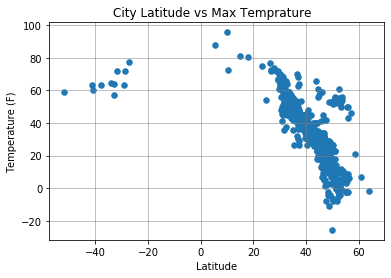

In [15]:
# create Lat vs. Max Temp correlation scatter plot
title = "City Latitude vs Max Temprature" + "  "
temp_plot = NA_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/NA_lat_temp.png')

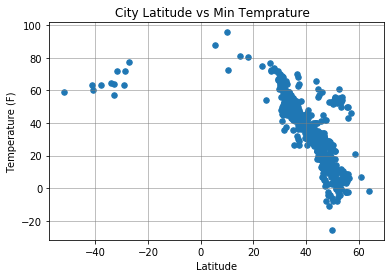

In [16]:
# create Lat vs. Min Temp correlation scatter plot
title = "City Latitude vs Min Temprature" + "  "
temp_plot = NA_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/NA_lat_temp.png')

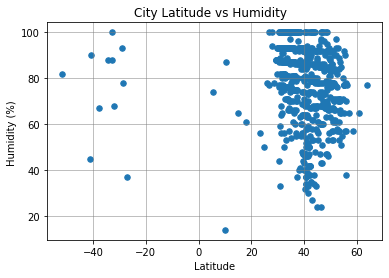

In [17]:
title = "City Latitude vs Humidity" + "  "
temp_plot = NA_list.plot.scatter(x='Lat',
                      y='Humidity',s=30,title=title)
temp_plot.set_ylabel("Humidity (%) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/NA_lat_humidity.png')

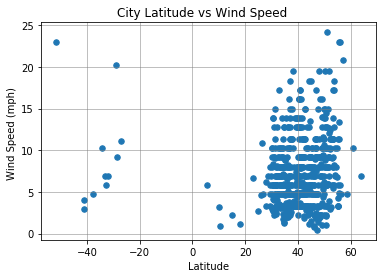

In [18]:
# create Lat vs. Wind Speed scatter plot
title = "City Latitude vs Wind Speed " + "  "
temp_plot = NA_list.plot.scatter(x='Lat',
                      y='Wind Speed',s=30,title=title)
temp_plot.set_ylabel("Wind Speed (mph) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/NA_lat_windspeed.png')

## Linear Regression

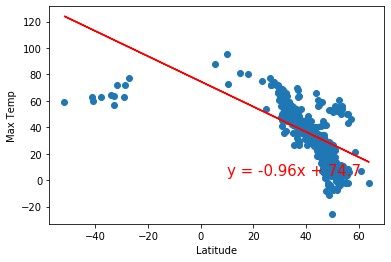

In [19]:
# create linear regressions for Northern Hemisphere - Max Temp vs. Latitude
x_values = NA_list['Lat']
y_values = NA_list['Max Temp']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

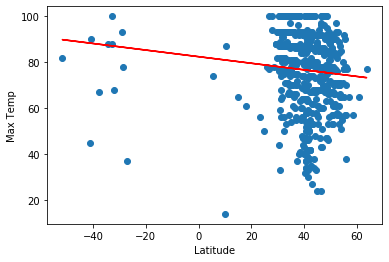

In [20]:
# create linear regressions for Humidity vs. Latitude
x_values = NA_list['Lat']
y_values = NA_list['Humidity']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

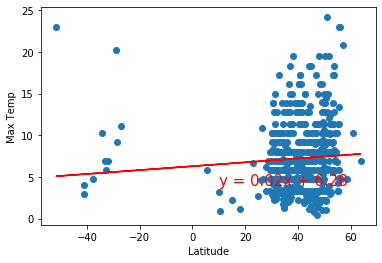

In [21]:
# create linear regressions for Wind Speed vs. Latitude
x_values = NA_list['Lat']
y_values = NA_list['Wind Speed']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')